# 項目：用線性回歸預測房價

## 分析目標

此數據分析報告的目的是，基於已有的房屋銷售價格以及相關的房屋屬性，進行線性回歸分析，從而利用所得的線性回歸模型，對以下未知售價的房屋根據屬性進行價格預測：

面積為 6500 平方英尺，有 4 個臥室、2 個廁所，總共 2 層，不位於主路，無客人房，帶地下室，有熱水器，沒有空調，車位數為 2，位於城市首選社區，簡裝修。

## 簡介

數據集 `house_price.csv` 記錄了超過五百棟房屋的交易價格，以及房屋的相關屬性信息，包括房屋面積、臥室數、廁所數、樓層數、是否位於主路、是否有客房等。

`house_price.csv` 每列的含義如下：

- **price**：房屋出售價格  
- **area**：房屋面積，以平方英尺為單位  
- **bedrooms**：臥室數  
- **bathrooms**：廁所數  
- **stories**：樓層數  
- **mainroad**：是否位於主路  
   - **yes**：是  
   - **no**：否  
- **guestroom**：是否有客房  
   - **yes**：是  
   - **no**：否  
- **basement**：是否有地下室  
   - **yes**：是  
   - **no**：否  
- **hotwaterheating**：是否有熱水器  
   - **yes**：是  
   - **no**：否  
- **airconditioning**：是否有空調  
   - **yes**：是  
   - **no**：否  
- **parking**：車庫容量，以車輛數量為單位  
- **prefarea**：是否位於城市首選社區  
   - **yes**：是  
   - **no**：否  
- **furnishingstatus**：裝修狀態  
   - **furnished**：精裝  
   - **semi-furnished**：簡裝  
   - **unfurnished**：毛坯  

### 讀取數據

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

導入數據分析所需的庫，並通過 Pandas 的 `read_csv` 函數，將原始數據文件 "house_price.csv" 裡的數據內容解析為 DataFrame，並賦值給變量 `original_house_price`。

In [2]:
original_house_price = pd.read_csv("house_price.csv")
original_house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### 評估和清理數據

在這一部分中，我們將對上一部分建立的 `original_house_price` DataFrame 所包含的數據進行評估和清理。

主要從兩個方面進行：結構和內容，即整齊度和乾淨度。

數據的結構性問題是指不符合「每個變量為一列，每個觀察值為一行，每種類型的觀察單位為一個表格」這三個標準；數據的內容性問題包括存在遺失數據、重複數據、無效數據等。

為了區分經過清理的數據和原始數據，我們創建一個新的變量 `cleaned_house_price`，讓它作為從 `original_house_price` 複製出的副本。我們之後的清理步驟都將應用在 `cleaned_house_price` 上。

In [3]:
cleaned_house_price = original_house_price.copy()

### 數據整齊度

In [4]:
cleaned_house_price.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


從前 10 行數據來看，數據符合「每個變量為一列，每個觀察值為一行，每種類型的觀察單位為一個表格」，因此不存在結構性問題。

### 數據乾淨度

透過`info`，對數據內容進行了解。

In [5]:
cleaned_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


從輸出結果來看，`cleaned_house_price` 共有 545 條觀察值，各變量不存在缺失值。

在數據類型方面，我們已知以下變量為分類數據：
- **mainroad**（是否位於主路）  
- **guestroom**（是否有客房）  
- **basement**（是否有地下室）  
- **hotwaterheating**（是否有熱水器）  
- **airconditioning**（是否有空調）  
- **prefarea**（是否位於城市首選社區）  
- **furnishingstatus**（裝修狀態）  

因此，可以將這些變量的數據類型轉換為 `Category`。

In [6]:
cleaned_house_price['mainroad'] = cleaned_house_price['mainroad'].astype("category")
cleaned_house_price['guestroom'] = cleaned_house_price['guestroom'].astype("category")
cleaned_house_price['basement'] = cleaned_house_price['basement'].astype("category")
cleaned_house_price['hotwaterheating'] = cleaned_house_price['hotwaterheating'].astype("category")
cleaned_house_price['airconditioning'] = cleaned_house_price['airconditioning'].astype("category")
cleaned_house_price['prefarea'] = cleaned_house_price['prefarea'].astype("category")
cleaned_house_price['furnishingstatus'] = cleaned_house_price['furnishingstatus'].astype("category")

In [7]:
cleaned_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


### 處理缺失數據

從 `info` 方法的輸出結果來看，`cleaned_house_price` 不存在缺失值，因此不需要對缺失數據進行處理。

### 處理重複數據

根據數據變量的含義以及內容來看，允許變量重複，因此我們不需要對此數據檢查是否存在重複值。

### 處理不一致數據

In [8]:
cleaned_house_price["mainroad"].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [9]:
cleaned_house_price["guestroom"].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [10]:
cleaned_house_price["basement"].value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [11]:
cleaned_house_price["hotwaterheating"].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [12]:
cleaned_house_price["airconditioning"].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [13]:
cleaned_house_price["prefarea"].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [14]:
cleaned_house_price["furnishingstatus"].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

從以上輸出結果來看，不存在不一致的數據。

### 處理無效或錯誤的數據

可以透過DataFrame的`describe`方法

In [15]:
cleaned_house_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


從以上統計資訊來看，`cleaned_house_price` 中不存在脫離現實意義的數值。

### 探索數據

線性回歸分析之前，我們可以先透過數據視覺化，探索數值變量的分佈，以及與房價存在相關性的變量，為後續的進一步分析提供方向。

In [16]:
sns.set_palette("pastel")

### 房價分佈

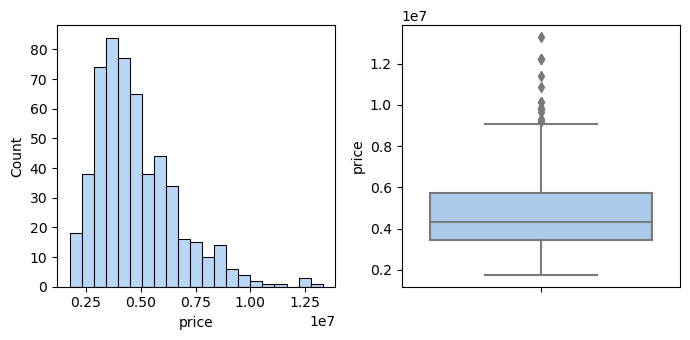

In [17]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='price', ax=axes[0])
sns.boxplot(cleaned_house_price, y='price', ax=axes[1])
plt.show()

房價呈右偏態分佈，說明數據集中的大多數房子價格屬於中等，但有一些價格非常高的極端值，使得均值被拉高。

### 面積分佈

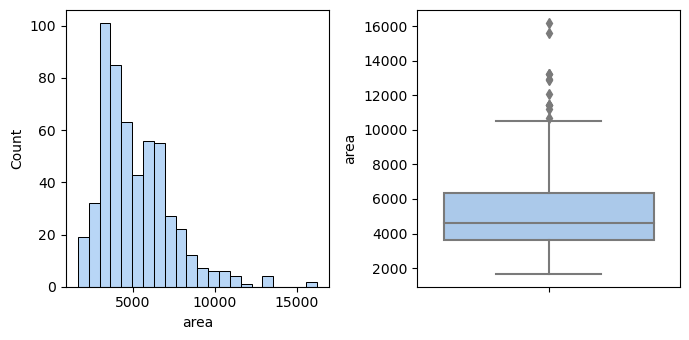

In [18]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='area', ax=axes[0])
sns.boxplot(cleaned_house_price, y='area', ax=axes[1])
plt.show()

面積的分佈與房價相似，都呈現右偏態分佈。

### 房價與面積的關係

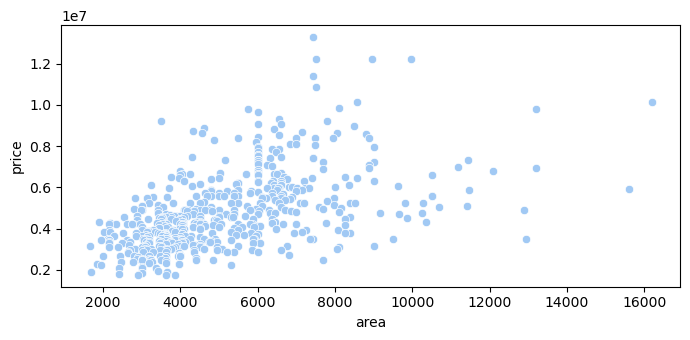

In [19]:
sns.scatterplot(cleaned_house_price, x='area', y='price')
plt.show()

從散點圖來看，可以大致看出一些正相關關係，但關係的強度需要後續通過計算相關性來確定。

### 臥室數量與房價

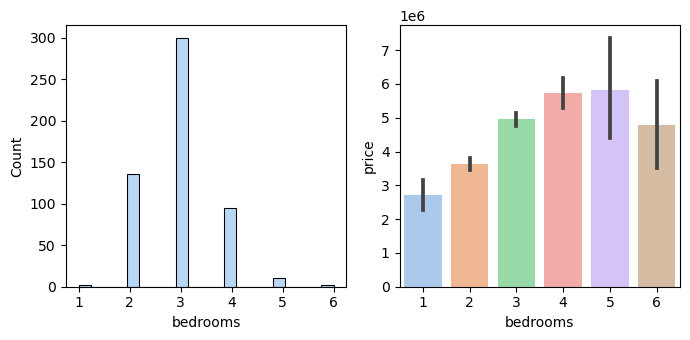

In [20]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='bedrooms', ax=axes[0])
sns.barplot(cleaned_house_price, x='bedrooms', y='price', ax=axes[1])
plt.show()

此數據集中房子的臥室數範圍為 1-6 個，其中大多數房子有 2-4 個臥室。

從平均房價與臥室數之間的柱狀圖來看，當臥室數少於 5 個時，臥室數越多的房子價格也相應較高，但一旦超過 5 個，房價並不一定隨之上升。

### 洗手間數量與房價

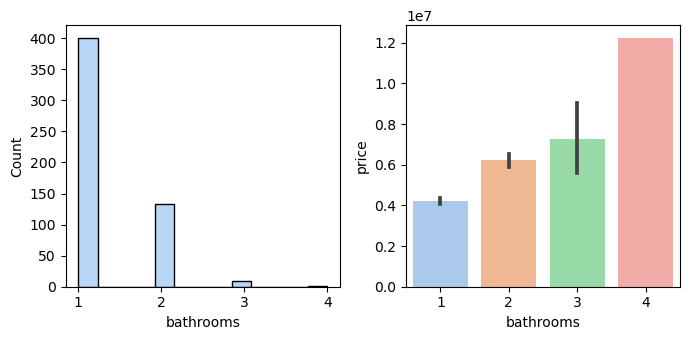

In [21]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='bathrooms', ax=axes[0])
sns.barplot(cleaned_house_price, x='bathrooms', y='price', ax=axes[1])
plt.show()

數據集中房子的洗手間數量最少為 1 個，最多為 4 個，其中 1 個洗手間的房子數量最多。

從平均房價與洗手間數之間的柱狀圖來看，洗手間數量越多的房子價格也相應較高。

### 樓層數與房價

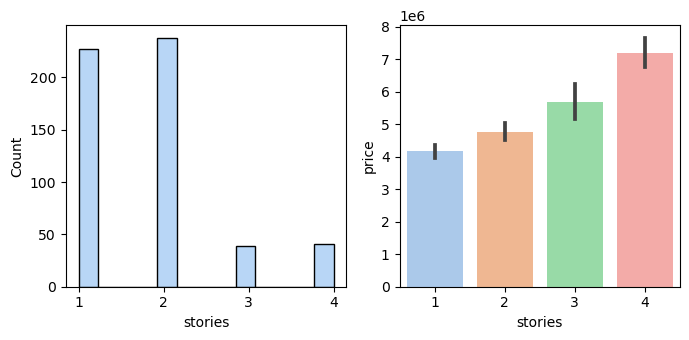

In [22]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='stories', ax=axes[0])
sns.barplot(cleaned_house_price, x='stories', y='price', ax=axes[1])
plt.show()

此數據集中房子的樓層數範圍為 1-4 層，其中大多數房子為 1 層或 2 層。

從平均房價與樓層數之間的柱狀圖來看，樓層數越多的房子價格也相應較高。

### 車庫數量與房價

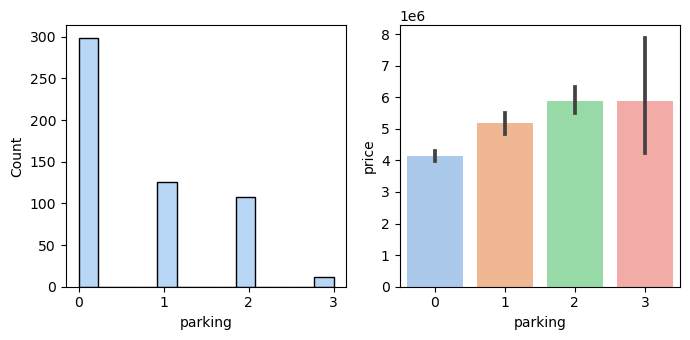

In [23]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='parking', ax=axes[0])
sns.barplot(cleaned_house_price, x='parking', y='price', ax=axes[1])
plt.show()

此數據集中房子的車庫數範圍為 0-3 個，其中不帶車庫的房子數量最多，其次是帶 1 個和 2 個車庫的房子。

從平均房價與車庫數之間的柱狀圖來看，車庫數量越多的房子價格也相應較高，但超過 2 個後，房價並不一定隨之上升。

### 是否在主路與房價

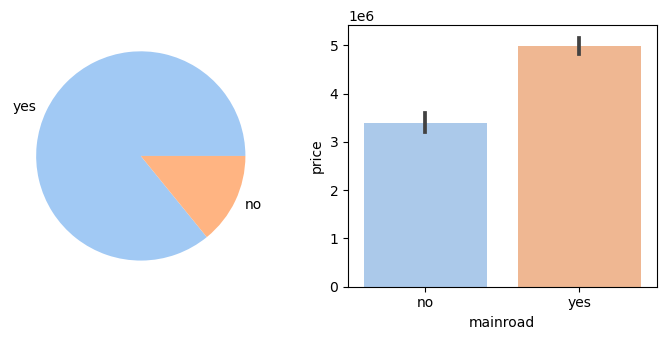

In [24]:
figure, axes = plt.subplots(1, 2)
mainroad_count = cleaned_house_price['mainroad'].value_counts()
mainroad_label = mainroad_count.index
axes[0].pie(mainroad_count, labels=mainroad_label)
sns.barplot(cleaned_house_price, x='mainroad', y='price', ax=axes[1])
plt.show()

此數據集中，大多數房子位於主路。

從平均房價與樓層數之間的柱狀圖來看，位於主路的房子價格也相應較高。

### 是否有客人房與房價

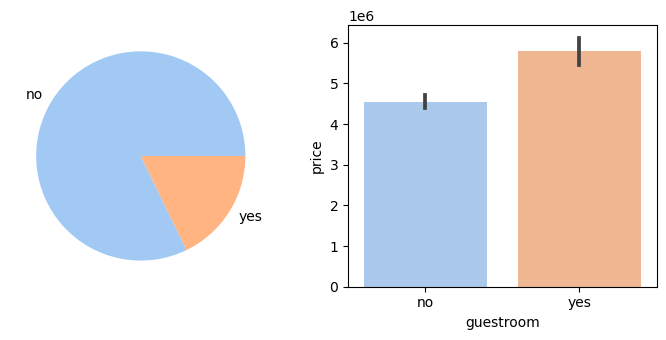

In [25]:
figure, axes = plt.subplots(1, 2)
guestroom_count = cleaned_house_price['guestroom'].value_counts()
guestroom_label = guestroom_count.index
axes[0].pie(guestroom_count, labels=guestroom_label)
sns.barplot(cleaned_house_price, x='guestroom', y='price', ax=axes[1])
plt.show()

此數據集中，大部分房子沒有客人房。

從平均房價與樓層數之間的柱狀圖來看，有客人房的房子價格也相應較高。

### 是否有地下室與房價

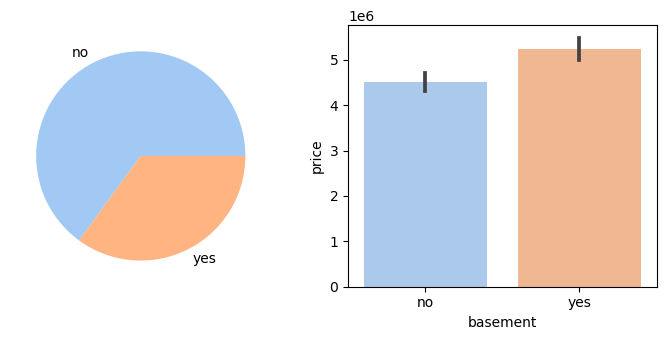

In [26]:
figure, axes = plt.subplots(1, 2)
basement_count = cleaned_house_price['basement'].value_counts()
basement_label = basement_count.index
axes[0].pie(basement_count, labels=basement_label)
sns.barplot(cleaned_house_price, x='basement', y='price', ax=axes[1])
plt.show()

此數據集中，大多數房子沒有地下室。

從平均房價與地下室之間的柱狀圖來看，有地下室的房子價格也相應較高。

### 是否有熱水器與房價

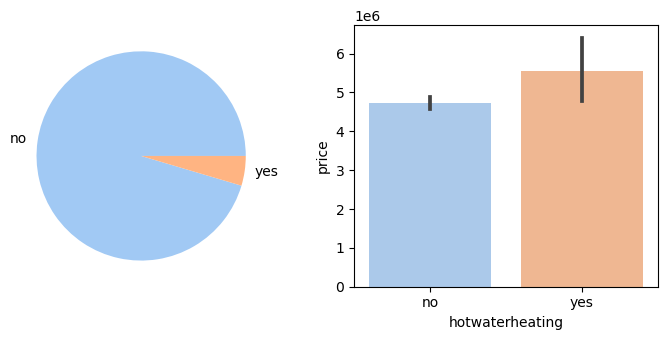

In [27]:
figure, axes = plt.subplots(1, 2)
hotwaterheating_count = cleaned_house_price['hotwaterheating'].value_counts()
hotwaterheating_label = hotwaterheating_count.index
axes[0].pie(hotwaterheating_count, labels=hotwaterheating_label)
sns.barplot(cleaned_house_price, x='hotwaterheating', y='price', ax=axes[1])
plt.show()

此數據集中，絕大部分房子沒有熱水器。

從平均房價與熱水器之間的柱狀圖來看，有熱水器的房子價格也相應較高。

### 是否有空調與房價

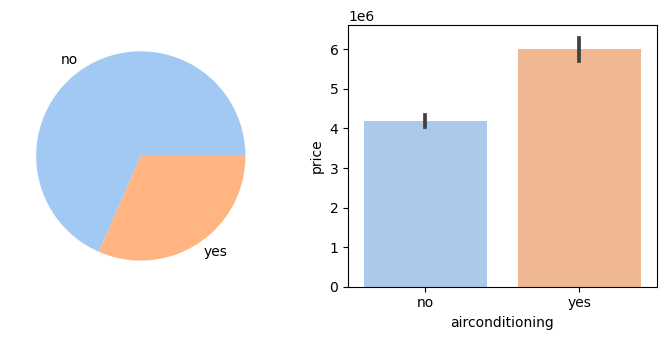

In [28]:
figure, axes = plt.subplots(1, 2)
airconditioning_count = cleaned_house_price['airconditioning'].value_counts()
airconditioning_label = hotwaterheating_count.index
axes[0].pie(airconditioning_count, labels=airconditioning_label)
sns.barplot(cleaned_house_price, x='airconditioning', y='price', ax=axes[1])
plt.show()

此數據集中，大多數房子沒有空調。

從平均房價與空調之間的柱狀圖來看，有空調的房子價格也相應較高。

### 是否位於城市首選社區與房價

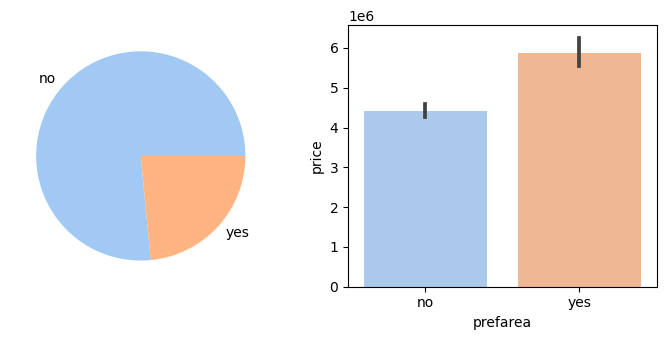

In [30]:
figure, axes = plt.subplots(1, 2)
prefarea_count = cleaned_house_price['prefarea'].value_counts()
prefarea_label = prefarea_count.index
axes[0].pie(prefarea_count, labels=prefarea_label)
sns.barplot(cleaned_house_price, x='prefarea', y='price', ax=axes[1])
plt.show()

此數據集中，大部分房子不位於城市首選社區。

從平均房價與城市首選社區之間的柱狀圖來看，位於城市首選社區的房子價格也相應較高。

### 裝修狀態與房價

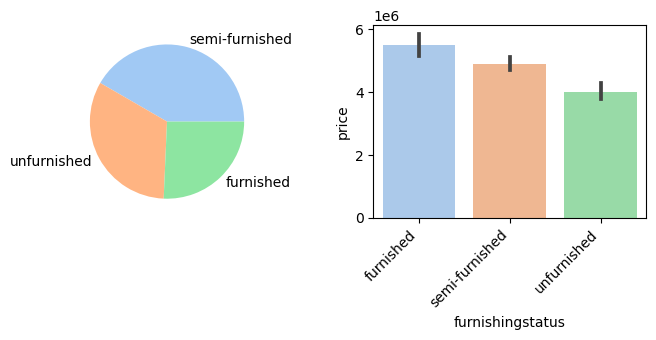

In [31]:
figure, axes = plt.subplots(1, 2)
furnishingstatus_count = cleaned_house_price['furnishingstatus'].value_counts()
furnishingstatus_label = furnishingstatus_count.index
axes[0].pie(furnishingstatus_count, labels=furnishingstatus_label)
sns.barplot(cleaned_house_price, x='furnishingstatus', y='price', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

此數據集中，簡裝和毛坯的房子較多，約 1/4 的房子為精裝。

從平均房價與裝修狀態之間的柱狀圖來看，精裝房的價格高於簡裝房，簡裝房的價格又高於毛坯房。

### 分析數據

在分析步驟中，我們將利用 `cleaned_house_price` 的數據進行線性回歸分析，目標是得到一個能夠根據房屋各個屬性來預測價格的數學模型。

我們先引入進行線性回歸所需的模組。

In [32]:
import statsmodels.api as sm

然後可以創建一個新的 DataFrame `lr_house_price`，讓它作為我們進行線性回歸分析所用的數據。

將其與 `cleaned_house_price` 區分開的原因是，我們在進行回歸分析之前，可能需要對數據進行一些準備工作，比如引入虛擬變量，這些都可以在 `lr_house_price` 上執行。

In [33]:
lr_house_price = cleaned_house_price.copy()

由於數據中存在分類變數，無法直接建立線性迴歸模型。我們需要引入虛擬變數，也就是用 0 和 1 分別表示是否屬於該分類。

In [34]:
lr_house_price = pd.get_dummies(lr_house_price, drop_first=True, columns=['mainroad', 'guestroom',
                                                         'basement', 'hotwaterheating',
                                                         'airconditioning','prefarea', 
                                                         'furnishingstatus'], dtype=int)
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


接下來，我們要將因變數和自變數劃分出來。

因變數是 `price` 變數，因為我們進行線性迴歸的目的，是建立一個能根據其他可能影響房屋價格的變數來預測銷售價格的模型。

In [35]:
y = lr_house_price['price']

我們可以將除價格之外的所有變數納入自變數，但需要檢查它們之間的相關性。如果某些變數之間的相關性很高，可能會導致共線性問題。

In [36]:
X = lr_house_price.drop('price', axis=1)

一般我們認為，當相關係數的絕對值大於 0.8 時，可能會導致嚴重的共線性，因此在檢查時，只需關注絕對值大於 0.8 的相關係數即可。

In [37]:
X.corr().abs() > 0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


從以上輸出來看，不同變數之間的相關係數絕對值均小於或等於 0.8。

接下來，為模型的線性方程添加截距。

In [38]:
X = sm.add_constant(X)
X

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


下一步就可以調用 OLS 函數，利用最小二乘法來計算線性迴歸模型的參數值，從而確定自變數與因變數之間的關係。

In [39]:
model = sm.OLS(y, X).fit()

為了查看模型的結果，我們可以使用 `summary` 方法來獲取模型的總結訊息。

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          9.07e-123
Time:                        22:02:00   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

當我們將顯著性水平設置為 0.05 時，從以上結果的 P 值可以看出，模型認為以下因素對房屋價格沒有顯著性影響：**臥室數**、**是否為簡裝房**。此外，常數項（截距）的 P 值也較大，表明其對模型的影響不顯著。

我們可以將這些變數移除後，重新建立線性回歸模型，以提高模型的簡潔性和解釋力。

In [41]:
X = X.drop(['const', 'bedrooms', 'furnishingstatus_semi-furnished'], axis=1)

In [42]:
model = sm.OLS(y, X).fit()

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Tue, 26 Nov 2024   Prob (F-statistic):                        0.00
Time:                        22:05:10   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

可以看到，當我們將 P 值較大的自變數從線性回歸模型中移除後，模型的 R² 值從 **0.682** 增長到了 **0.957**，顯著提高了模型對現有數據的擬合度。這表明移除不顯著變數後，模型的解釋力得到了增強，更能準確地反映因變數與自變數之間的關係。

根據各個自變數在線性回歸方程中的係數來看，模型預測以下因素的增加（或存在）會顯著增加房屋價格：房屋面積、廁所數、樓層數、車庫容量、位於主路、有客房、有地下室、有熱水器、有空調、位於城市首選社區。

線性回歸模型預測以下因素的增加（或存在）會顯著降低房屋價格：房屋未經裝修，為毛坯房。

In [44]:
# 要預測房價的房屋的信息：  
# 面積為6500平方英尺，有4個臥室、2個廁所，總共2層，不位於主路，無客人房，帶地下室，有熱水器，沒有空調，車位數為2，位於城市首選社區，簡裝修

In [45]:
price_to_predict = pd.DataFrame({'area': [5600], 'bedrooms': [4], 'bathrooms': [2], 
                                 'stories': [2], 'mainroad': ['no'], 'guestroom': ['no'],
                                 'basement': ['yes'], 'hotwaterheating': ['yes'],
                                 'airconditioning': ['no'], 'parking': 2, 'prefarea': ['yes'],
                                 'furnishingstatus': ['semi-furnished']})
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


我們需要將分類變數的類型轉換為 Category，並且通過 `categories` 參數，讓程序知道所有可能的分類值。這樣做的原因是，預測數據中包含的分類可能不完整。我們需要確保在引入虛擬變數時，不會遺漏某個或某些分類。

In [46]:
price_to_predict['mainroad'] = pd.Categorical(price_to_predict['mainroad'], categories=['no', 'yes'])
price_to_predict['guestroom'] = pd.Categorical(price_to_predict['guestroom'], categories=['no', 'yes'])
price_to_predict['basement'] = pd.Categorical(price_to_predict['basement'], categories=['no', 'yes'])
price_to_predict['hotwaterheating'] = pd.Categorical(price_to_predict['hotwaterheating'], categories=['no', 'yes'])
price_to_predict['airconditioning'] = pd.Categorical(price_to_predict['airconditioning'], categories=['no', 'yes'])
price_to_predict['prefarea'] = pd.Categorical(price_to_predict['prefarea'], categories=['no', 'yes'])
price_to_predict['furnishingstatus'] = pd.Categorical(price_to_predict['furnishingstatus'], categories=['furnished', 'semi-furnished', 'unfurnished'])

In [47]:
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


下一步，對分類變量引入虛擬變量。

In [48]:
price_to_predict = pd.get_dummies(price_to_predict, drop_first=True, 
                                  columns=['mainroad', 'guestroom',
                                           'basement', 'hotwaterheating',
                                           'airconditioning','prefarea', 
                                           'furnishingstatus'], dtype=int)
price_to_predict.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5600,4,2,2,2,0,0,1,1,0,1,1,0


In [49]:
price_to_predict = price_to_predict.drop(['bedrooms', 'furnishingstatus_semi-furnished'], axis=1)

接下来就可以調用線性回歸模型`predict`方法，獲得預測價格。

In [50]:
predicted_value = model.predict(price_to_predict)
predicted_value

0    7.071927e+06
dtype: float64

線性回歸模型預測的價格為：7071927。